In [ ]:
import pickle


results = pickle.load(open('/content/sample_data/results.p', "rb"))

print (results.keys())

dict_keys(['word2vec', 'glove', 'bert'])


In [ ]:
def tft(t):
    #return t
    if t<60:
        return str(round(t, 1))+'s'
    elif t<60*60 and t>=60:
        return str(int(t/60))+'m '+str(int(t%60))+'s'
    elif t>=60*60:
        return str(int(t/(60*60)))+'h '+str(int(t%(60*60)/60))+'m'

for k in results.keys():
    print ("\n<<<<<<<<<<     Embedding {}   >>>>>>>>>>".format(k))
    for l in results[k].keys():
        print ("===  {}  ===".format(l))
        for j in results[k][l].keys():
            if j in ['time_preprocess', 'time_train']:
                print ("{}: {}".format(j, tft(results[k][l][j])))
            else:
                print ("{}: {}".format(j, results[k][l][j]))


<<<<<<<<<<     Embedding word2vec   >>>>>>>>>>
===  CR  ===
devacc: 82.3321554770318
acc: 80.95
ndev: 566
ntest: 566
best_params: {'l2reg': 0.001131730444026091, 'lr': 0.057619377919681664, 'max_epoch': 50.0, 'type': {'act_fn': 'sigmoid', 'dropout': 0.16296603530730489, 'nb_hid': 120.0, 'nb_layers': 1, 'type': 'MLP'}}
time_preprocess: 2.1s
time_train: 10m 46s
===  TREC  ===
devacc: 75.27539779681763
acc: 83.0
ndev: 5452
ntest: 500
best_params: {'l2reg': 0.0012997728271361723, 'lr': 0.11241652736157995, 'max_epoch': 40.0, 'type': {'act_fn': 'elu', 'dropout': 0.36332083454013503, 'nb_hid': 100.0, 'nb_layers': 2, 'type': 'MLP'}}
time_preprocess: 2.0s
time_train: 31m 46s
===  SICKEntailment  ===
devacc: 79.2
acc: 78.49
ndev: 500
ntest: 4927
best_params: {'l2reg': 0.001206519195640514, 'lr': 0.31167131976710516, 'max_epoch': 50.0, 'type': {'act_fn': 'elu', 'dropout': 0.5580976745433995, 'nb_hid': 30.0, 'nb_layers': 3, 'type': 'MLP'}}
time_preprocess: 6.5s
time_train: 24m 48s
===  SST5  ===

In [ ]:
from prettytable import PrettyTable
tasks = ['CR', 'TREC', 'SICKEntailment', 'MRPC', 'SUBJ', 'MPQA']
embs = list(results.keys())
embs = ['word2vec', 'glove', 'bert']
print(results)
for METRIC in ['acc', 'time_preprocess', 'time_train', 'devacc']:
    res = {}
    METRIC2 = None
    for e in embs:
        res[e] = []
        for t in tasks:
            try:
                if METRIC2 is None:
                    # Format the value with 4 decimal places
                    res[e].append("{:.4f}".format(results[e][t][METRIC]))
                else:
                    # Format the value with 4 decimal places
                    res[e].append("{:.4f}".format(results[e][t]['best_params'][METRIC2]))
            except KeyError:
                pass

# Create a PrettyTable object with proper gridlines
table = PrettyTable()

# Add columns to the table
table.field_names = ['Task'] + embs

# Add rows to the table
for t in tasks:
    row_data = [t]
    for e in embs:
        try:
            row_data.append(res[e][tasks.index(t)])
        except IndexError:
            row_data.append('-')  # Use a placeholder if data is not available
    table.add_row(row_data)

# Customize table appearance


# Print the table
print(table)

{'word2vec': {'CR': {'devacc': 82.3321554770318, 'acc': 80.95, 'ndev': 566, 'ntest': 566, 'best_params': {'l2reg': 0.001131730444026091, 'lr': 0.057619377919681664, 'max_epoch': 50.0, 'type': {'act_fn': 'sigmoid', 'dropout': 0.16296603530730489, 'nb_hid': 120.0, 'nb_layers': 1, 'type': 'MLP'}}, 'time_preprocess': 2.144458770751953, 'time_train': 646.1858093738556}, 'TREC': {'devacc': 75.27539779681763, 'acc': 83.0, 'ndev': 5452, 'ntest': 500, 'best_params': {'l2reg': 0.0012997728271361723, 'lr': 0.11241652736157995, 'max_epoch': 40.0, 'type': {'act_fn': 'elu', 'dropout': 0.36332083454013503, 'nb_hid': 100.0, 'nb_layers': 2, 'type': 'MLP'}}, 'time_preprocess': 1.9990227222442627, 'time_train': 1906.1561479568481}, 'SICKEntailment': {'devacc': 79.2, 'acc': 78.49, 'ndev': 500, 'ntest': 4927, 'best_params': {'l2reg': 0.001206519195640514, 'lr': 0.31167131976710516, 'max_epoch': 50.0, 'type': {'act_fn': 'elu', 'dropout': 0.5580976745433995, 'nb_hid': 30.0, 'nb_layers': 3, 'type': 'MLP'}}, '

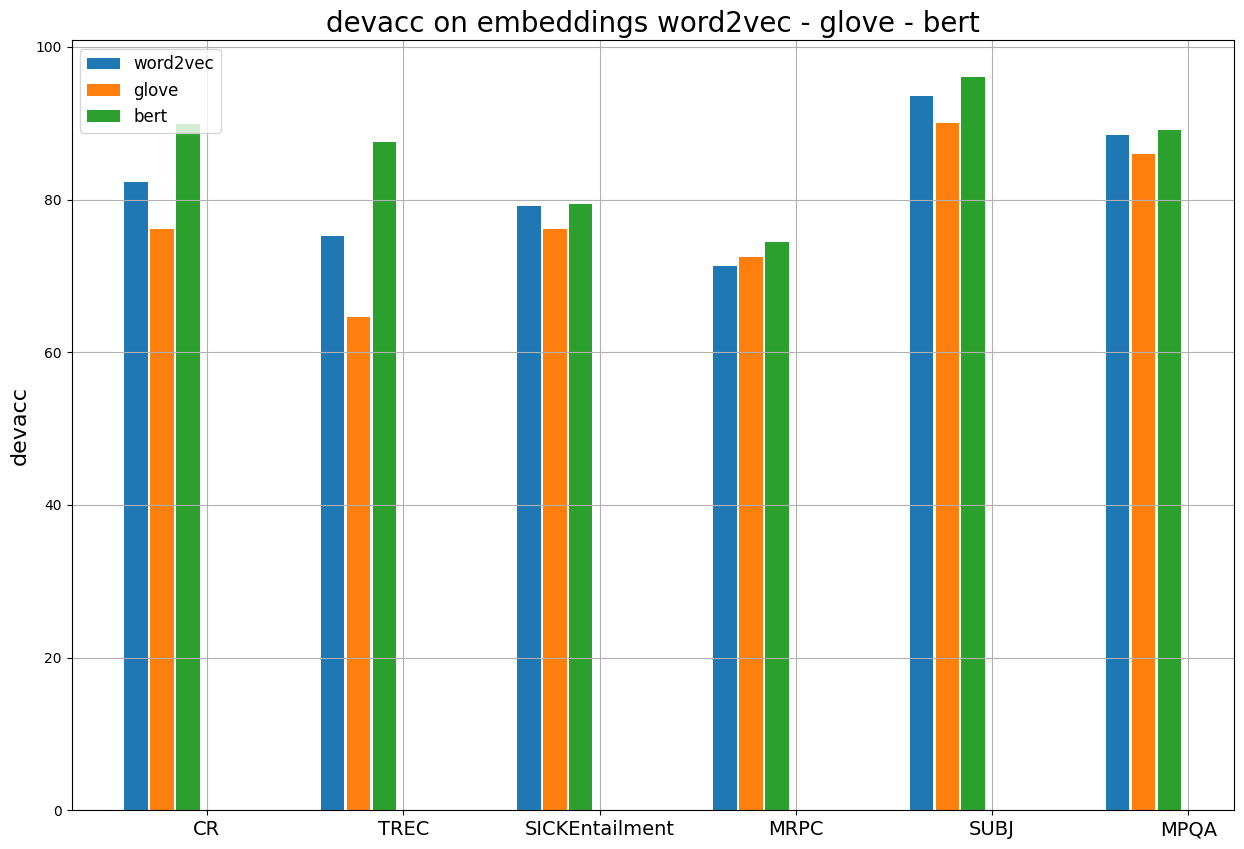

In [ ]:
import matplotlib.pyplot as plt
tasks = ['CR', 'TREC', 'SICKEntailment', 'MRPC', 'SUBJ', 'MPQA']
embs = list(results.keys())
embs = ['word2vec', 'glove', 'bert']

for METRIC in  ['acc', 'time_preprocess', 'time_train', 'devacc']:
    res = {}
    METRIC2 = None
    for e in embs:
        res[e] = []
        for t in tasks:
            try:
                if METRIC2 is None:
                    res[e].append(results[e][t][METRIC])
                else:
                    res[e].append(results[e][t]['best_params'][METRIC2])
            except KeyError:
                pass

pos = list(range(len(tasks)))
width = 0.12
gap = 0.02

fig, ax = plt.subplots(figsize=(15,10))
for i, e in enumerate(embs):

    if e=="word2vec" or  e=="glove" or e=="bert":
       plt.bar([p + i*width*1.1 for p in pos], res[e], width, label=e)

ax.set_ylabel(METRIC, fontsize=16)  # Set font size for the y-axis label
ax.set_title("{} on embeddings {}".format(METRIC, ' - '.join(embs)), fontsize=20)
ax.set_xticks([p + len(tasks)/2 * width for p in pos])
ax.set_xticklabels(tasks, fontsize=14)  # Set font size for x-axis tick labels

plt.legend(embs, loc='upper left', fontsize=12)
plt.grid()
plt.show()

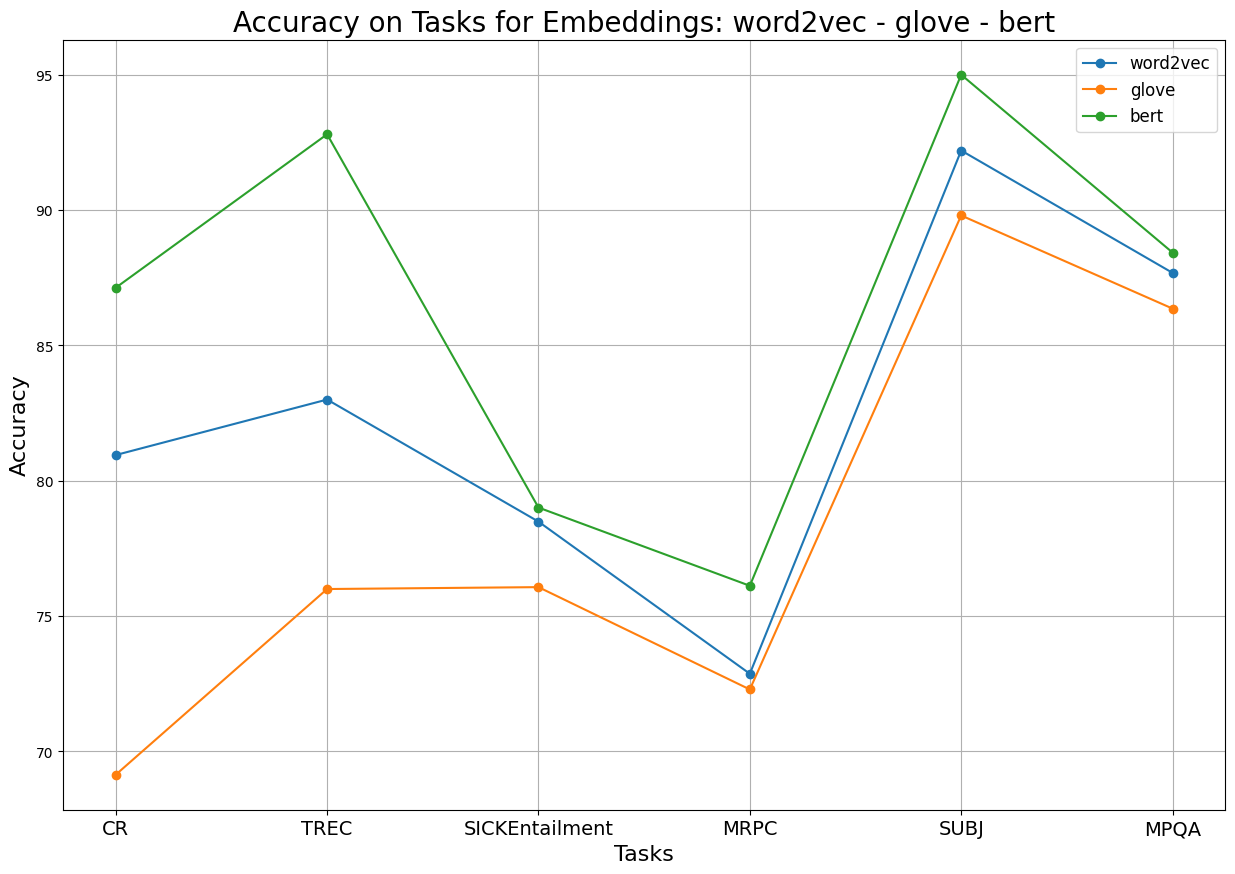

In [ ]:
import matplotlib.pyplot as plt

tasks = ['CR', 'TREC', 'SICKEntailment', 'MRPC', 'SUBJ', 'MPQA']
embs = ['word2vec', 'glove', 'bert']

fig, ax = plt.subplots(figsize=(15, 10))

for e in embs:
    acc_values = []
    for t in tasks:
        try:
            acc_values.append(results[e][t]['acc'])
        except KeyError:
            acc_values.append(None)

    ax.plot(tasks, acc_values, label=e, marker='o')

ax.set_xlabel('Tasks', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title(f"Accuracy on Tasks for Embeddings: {' - '.join(embs)}", fontsize=20)
ax.set_xticks(tasks)
ax.set_xticklabels(tasks, fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

# Assuming 'results' contains the relevant data

tasks = ['CR', 'TREC', 'SICKEntailment', 'MRPC', 'SUBJ', 'MPQA']
embs = ['word2vec', 'glove', 'bert']

table_data = []

for t in tasks:
    row = [t]
    for e in embs:
        try:
            time_train = results[e][t]['time_train']
            row.append(time_train)
        except KeyError:
            row.append(None)
    table_data.append(row)

headers = ['Task'] + embs

# 'simple' is just one of many possible table formats
table = tabulate(table_data, headers, tablefmt='simple')

print(table)

Task              word2vec     glove      bert
--------------  ----------  --------  --------
CR                 646.186   596.109   850.513
TREC              1906.16   1521.37   1634.69
SICKEntailment    1488.14   1291.24   2169.51
MRPC              1129.44    761.473  1547.59
SUBJ              2532.99   1698.3    1918.33
MPQA              1942.28   1033.61   1722.95


# New Section

# New Section